In [145]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


In [133]:
data = pd.read_csv("DONNES/train_cap2018.csv")
data.head()

,fulltext,sentences,words,letters.all,syllables,punct,avg.sentc.length,avg.word.length,avg.syll.word,sntc.per.word,...,Maas lgV0,MATTR,MSTTR,MTLD,Root TTR,Summer,TTR.1,Uber index,Yule's K,level1
0,\r\r\n The Eiffel Tower The Eiffel Tower ...,16,233,1116,363,32,14.562500,4.789700,1.557940,0.068670,...,4.96,0.72,0.70,70.74,8.98,0.88,0.59,24.30,146.62,C2
1,\r\r\n The Court Green burglar arrested A...,7,180,866,268,18,25.714286,4.811111,1.488889,0.038889,...,5.07,0.74,0.76,107.12,8.57,0.89,0.64,26.14,141.98,C2
2,\r\r\n Thank you for giving us the opport...,10,180,861,269,20,18.000000,4.783333,1.494444,0.055556,...,5.99,0.77,0.78,161.93,9.62,0.92,0.72,35.15,62.96,C2
3,\r\r\n The international AI conference ca...,10,180,872,281,20,18.000000,4.844444,1.561111,0.055556,...,5.49,0.77,0.81,141.10,9.09,0.90,0.68,30.11,70.99,C2
4,\r\r\n I believe that the creative writin...,11,187,849,283,29,17.000000,4.540107,1.513369,0.058824,...,4.61,0.68,0.64,70.69,7.97,0.87,0.58,22.02,124.11,C2


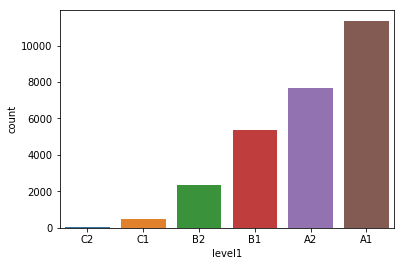

In [134]:
import seaborn as sns
sns.countplot(data['level1'],label="Count")
plt.show()

In [135]:
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm

X = data.iloc[:, 1:59]
y = data['level1']



In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


#print(type(X_test))

#Ici on transforme X_train, X_test, de dataframe à ndarray, on effectue les test sur le type ndarray

X_train =  X_train.fillna(X_train.mean())  #Trouvé sur : https://datascience.stackexchange.com/questions/11928/valueerror-input-contains-nan-infinity-or-a-value-too-large-for-dtypefloat32
X_train = scaler.fit_transform(X_train)

X_test =  X_test.fillna(X_test .mean()) #Pareil mais pour X_test, remplace les Nan
X_test = scaler.transform(X_test)



In [181]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)



print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))

print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

2784     B2
21571    A1
6940     B1
22193    A1
8359     A2
2232     B2
13095    A2
23095    A1
15962    A1
22485    A1
16951    A1
3460     B1
13994    A2
21315    A1
27257    A1
5027     B1
11275    A2
10210    A2
1353     B2
10779    A2
14666    A2
7849     B1
7834     B1
16328    A1
17391    A1
24111    A1
3718     B1
1787     B2
13220    A2
19844    A1
         ..
5072     B1
2163     B2
6036     B1
6921     B1
6216     B1
16921    A1
26277    A1
2897     B1
24152    A1
18606    A1
10327    A2
18983    A1
17089    A1
14650    A2
19852    A1
6744     B1
15832    A2
15430    A2
14935    A2
14116    A2
22258    A1
20757    A1
24275    A1
9225     A2
21243    A1
13123    A2
19648    A1
9845     A2
10799    A2
2732     B2
Name: level1, Length: 20482, dtype: object
Accuracy of Logistic regression classifier on training set: 0.72
Accuracy of Logistic regression classifier on test set: 0.73


In [138]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.73


In [182]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

2784     B2
21571    A1
6940     B1
22193    A1
8359     A2
2232     B2
13095    A2
23095    A1
15962    A1
22485    A1
16951    A1
3460     B1
13994    A2
21315    A1
27257    A1
5027     B1
11275    A2
10210    A2
1353     B2
10779    A2
14666    A2
7849     B1
7834     B1
16328    A1
17391    A1
24111    A1
3718     B1
1787     B2
13220    A2
19844    A1
         ..
5072     B1
2163     B2
6036     B1
6921     B1
6216     B1
16921    A1
26277    A1
2897     B1
24152    A1
18606    A1
10327    A2
18983    A1
17089    A1
14650    A2
19852    A1
6744     B1
15832    A2
15430    A2
14935    A2
14116    A2
22258    A1
20757    A1
24275    A1
9225     A2
21243    A1
13123    A2
19648    A1
9845     A2
10799    A2
2732     B2
Name: level1, Length: 20482, dtype: object
Accuracy of K-NN classifier on training set: 0.84
Accuracy of K-NN classifier on test set: 0.78


In [183]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

2784     B2
21571    A1
6940     B1
22193    A1
8359     A2
2232     B2
13095    A2
23095    A1
15962    A1
22485    A1
16951    A1
3460     B1
13994    A2
21315    A1
27257    A1
5027     B1
11275    A2
10210    A2
1353     B2
10779    A2
14666    A2
7849     B1
7834     B1
16328    A1
17391    A1
24111    A1
3718     B1
1787     B2
13220    A2
19844    A1
         ..
5072     B1
2163     B2
6036     B1
6921     B1
6216     B1
16921    A1
26277    A1
2897     B1
24152    A1
18606    A1
10327    A2
18983    A1
17089    A1
14650    A2
19852    A1
6744     B1
15832    A2
15430    A2
14935    A2
14116    A2
22258    A1
20757    A1
24275    A1
9225     A2
21243    A1
13123    A2
19648    A1
9845     A2
10799    A2
2732     B2
Name: level1, Length: 20482, dtype: object
Accuracy of LDA classifier on training set: 0.73
Accuracy of LDA classifier on test set: 0.74


C:\Users\Noctis\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [185]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)



print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))


Accuracy of GNB classifier on training set: 0.65
Accuracy of GNB classifier on test set: 0.66
2784     B2
21571    A1
6940     B1
22193    A1
8359     A2
2232     B2
13095    A2
23095    A1
15962    A1
22485    A1
16951    A1
3460     B1
13994    A2
21315    A1
27257    A1
5027     B1
11275    A2
10210    A2
1353     B2
10779    A2
14666    A2
7849     B1
7834     B1
16328    A1
17391    A1
24111    A1
3718     B1
1787     B2
13220    A2
19844    A1
         ..
5072     B1
2163     B2
6036     B1
6921     B1
6216     B1
16921    A1
26277    A1
2897     B1
24152    A1
18606    A1
10327    A2
18983    A1
17089    A1
14650    A2
19852    A1
6744     B1
15832    A2
15430    A2
14935    A2
14116    A2
22258    A1
20757    A1
24275    A1
9225     A2
21243    A1
13123    A2
19648    A1
9845     A2
10799    A2
2732     B2
Name: level1, Length: 20482, dtype: object


In [187]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

print('Accuracy of RandomForest classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

print('Accuracy of RandomForest classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))



Accuracy of RandomForest classifier on training set: 0.99
Accuracy of RandomForest classifier on test set: 0.79


In [142]:
print(type(y_test))

<class 'pandas.core.series.Series'>


In [143]:
print(type(X_test))

<class 'numpy.ndarray'>
